# PetFinder.my Adoption Prediction: an initial look at the data

## Introduction

This notebook is the first part of the analysis of the data for the [PetFinder.my Adoption Prediction competition](https://www.kaggle.com/c/petfinder-adoption-prediction) on Kaggle. I only look here at the `train.csv` and `test.csv` datasets; those relating to images and descriptions (e.g. those in `train_sentiment` and `train_metadata`) are considered in the feature engineering notebook (`feature_engineering.ipynb`).

## Libraries

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Data loading

In [2]:
DATA_PATH = os.path.join(os.pardir, 'data', 'raw')

In [3]:
!ls {DATA_PATH}

breed_labels.csv       test.csv		   train.csv
color_labels.csv       test_images.zip	   train_images.zip
sample_submission.csv  test_metadata.zip   train_metadata.zip
sentiment	       test_sentiment.zip  train_sentiment.zip
state_labels.csv       test.zip		   train.zip


In [3]:
all_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
all_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))

In [51]:
states = pd.read_csv(os.path.join(DATA_PATH, 'state_labels.csv'))

## Function definitions

Useful functions for data visualisation, all grouped together here for ease of finding later.

In [4]:
def display_all_vars(df):
    """
    By default, the display() function for a pandas dataframe only shows a limited number of the total columns of the df.
    This function provides a wrapper that temporarily changes that behaviour
    """
    with pd.option_context("display.max_columns", 1000):
        display(df)

In [5]:
def train_test_catplot(var_name:str):
    """
    Plots sns.catplot() for a variable in both the training and test datasets
    """
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    g = sns.catplot(x=var_name, data=all_train, kind='count', ax=ax[0])
    ax[0].set_title('Train')
    plt.close(g.fig)
    g = sns.catplot(x=var_name, data=all_test, kind='count', ax=ax[1])
    ax[1].set_title('Test')
    plt.close(g.fig)
    plt.show()

In [6]:
def speed_catplot(var_name:str, title1:str, title2:str):
    """
    Plots both within and between-variable sns.catplot() for AdoptionSpeed
    """
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    g = sns.catplot(x=var_name, hue='AdoptionSpeed', data=all_train, kind='count', ax=ax[0])
    ax[0].set_title(title1)
    plt.close(g.fig)
    g = sns.catplot(x='AdoptionSpeed', hue=var_name, data=all_train, kind='count', ax=ax[1])
    ax[1].set_title(title2)
    plt.close(g.fig)
    plt.show()

In [10]:
def train_test_distplot(var_name:str):
    """
    Plots sns.distplot() for a continuous variable in both the training and test datasets
    """
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.distplot(all_train[var_name], kde=False, ax=ax[0])
    ax[0].set_title('Train')
    sns.distplot(all_test[var_name], kde=False, ax=ax[1])
    ax[1].set_title('Test')
    plt.show()

In [19]:
def speed_stripplot(var_name: str):
    plt.figure(figsize=(12, 5))
    sns.stripplot(x='AdoptionSpeed', y=var_name, data=all_train)
    plt.title(f'{var_name} by adoption speed')
    plt.show()

## Data summaries

### Data frame sizes

In [10]:
print(f"The training data contains {all_train.shape[0]} observations and {all_train.shape[1]} features")
print(f"The testing data contains {all_test.shape[0]} observations and {all_test.shape[1]} features")

The training data contains 14993 observations and 24 features
The testing data contains 3948 observations and 23 features


The missing feature in the testing data is the prediction target `AdoptionSpeed`.

### Data frame heads

The values of the top 5 rows of both the training and testing datasets. All variables are included.

In [11]:
display_all_vars(all_train.head().T)

,0,1,2,3,4
Type,2,2,1,1,1
Name,Nibble,No Name Yet,Brisco,Miko,Hunter
Age,3,1,1,4,1
Breed1,299,265,307,307,307
Breed2,0,0,0,0,0
Gender,1,1,1,2,1
Color1,1,1,2,1,1
Color2,7,2,7,2,0
Color3,0,0,0,0,0
MaturitySize,1,2,2,2,2


In [14]:
display_all_vars(all_test.head().T)

,0,1,2,3,4
Type,1,2,2,2,1
Name,Puppy,London,Snowball,Malibu,Lala Girl
Age,2,24,20,5,6
Breed1,307,266,266,266,307
Breed2,0,0,0,252,0
Gender,1,1,2,2,2
Color1,1,2,7,1,1
Color2,0,7,0,6,2
Color3,0,0,0,7,7
MaturitySize,2,2,2,2,2


### Descriptive statistics

Basic descriptive statistics for each feature in the training and testing data.

In [16]:
display_all_vars(all_train.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,14993,NaN,NaN,NaN,1.45761,0.498217,1,1,1,2,2
Name,13736,9060,Baby,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,14993,NaN,NaN,NaN,10.4521,18.1558,0,2,3,12,255
Breed1,14993,NaN,NaN,NaN,265.273,60.0568,0,265,266,307,307
Breed2,14993,NaN,NaN,NaN,74.0097,123.012,0,0,0,179,307
Gender,14993,NaN,NaN,NaN,1.77616,0.681592,1,1,2,2,3
Color1,14993,NaN,NaN,NaN,2.23418,1.74523,1,1,2,3,7
Color2,14993,NaN,NaN,NaN,3.22284,2.74256,0,0,2,6,7
Color3,14993,NaN,NaN,NaN,1.88201,2.98409,0,0,0,5,7
MaturitySize,14993,NaN,NaN,NaN,1.862,0.547959,1,2,2,2,4


In [17]:
display_all_vars(all_test.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,3948,NaN,NaN,NaN,1.52609,0.499382,1,1,2,2,2
Name,3645,2855,Brownie,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,3948,NaN,NaN,NaN,11.5646,18.5684,0,2,4,12,180
Breed1,3948,NaN,NaN,NaN,263.033,59.1781,2,265,266,307,307
Breed2,3948,NaN,NaN,NaN,57.3594,112.087,0,0,0,0,307
Gender,3948,NaN,NaN,NaN,1.78267,0.692633,1,1,2,2,3
Color1,3948,NaN,NaN,NaN,2.23202,1.73661,1,1,2,3,7
Color2,3948,NaN,NaN,NaN,3.35562,2.70014,0,0,3,6,7
Color3,3948,NaN,NaN,NaN,2.0613,3.04136,0,0,0,6,7
MaturitySize,3948,NaN,NaN,NaN,1.82447,0.569772,1,1,2,2,4


### Feature datatypes

The (pandas) datatype of each feature in both the training and testing data.

In [18]:
all_train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [19]:
all_test.dtypes

Type              int64
Name             object
Age               int64
Breed1            int64
Breed2            int64
Gender            int64
Color1            int64
Color2            int64
Color3            int64
MaturitySize      int64
FurLength         int64
Vaccinated        int64
Dewormed          int64
Sterilized        int64
Health            int64
Quantity          int64
Fee               int64
State             int64
RescuerID        object
VideoAmt          int64
Description      object
PetID            object
PhotoAmt        float64
dtype: object

The majority of features are numeric (either int64 or float64). However, many of these are actually numeric representations of categorical data and will be treated as such during visualisation.

### Missing values

In [20]:
all_train.isna().sum()

Type                0
Name             1257
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        12
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

In [21]:
all_test.isna().sum()

Type              0
Name            303
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
RescuerID         0
VideoAmt          0
Description       2
PetID             0
PhotoAmt          0
dtype: int64

Very few variables have missing values. Those that do are both text data and not considered during the EDA in this notebook. I return to them in the feature engineering notebook.

## Target feature: Adoption Speed

The goal of the competition is to predict the Adoption Speed. This feature consists of five categories, represented by numbers 0 - 4. The meanings of each category, as listed in the competition information on Kaggle, are:

- 0 - Pet was adopted on the same day as it was listed.
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed.
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed.
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).


As this feature is, of course, absent in the testing data, this section examines only the training data.

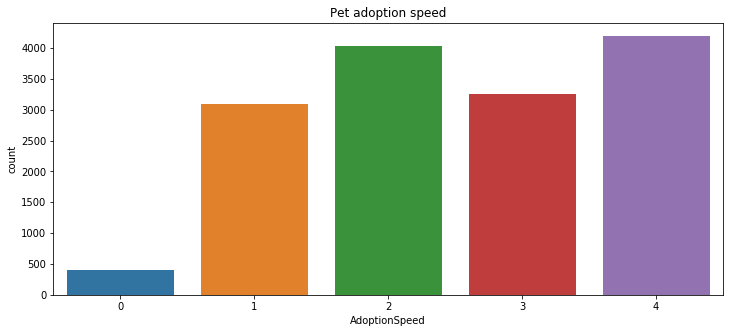

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(x='AdoptionSpeed', data=all_train)
plt.title('Pet adoption speed')
plt.show()

Very few pets are adopted the same day as they are listed (0). However, there is very little in the way of a clear pattern in the remaining adoption speed categories. Almost an equal number of pets wait either between 1 and 7 days (1) or between 31 and 90 days (3). Very slightly more are listed for over 100 days (4) than between 8 and 30 days (2), although this difference appeares largely negligable.

## Pet species

The `Type` feature encodes the species of pet for that adoption listing where:

- 1 = Dog
- 2 = Cat.

While multiple pets are sometimes included in a single listing, all pets within that listing are of the same type.

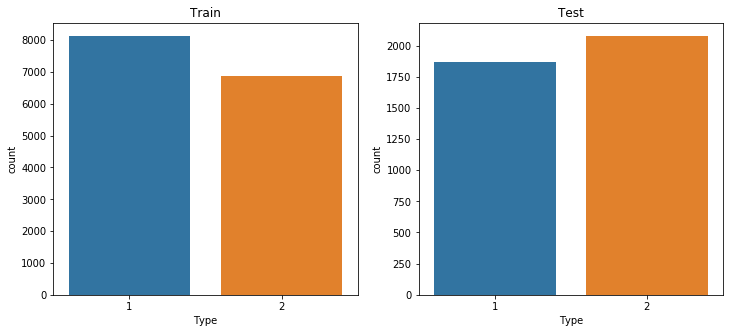

In [7]:
train_test_catplot('Type')

The pet type distributions are not identical between the training and testing data with the former having more cats than dogs than the latter. When it comes to the prediction stage, however, this will likely make minimal, if any, difference to accuracy.

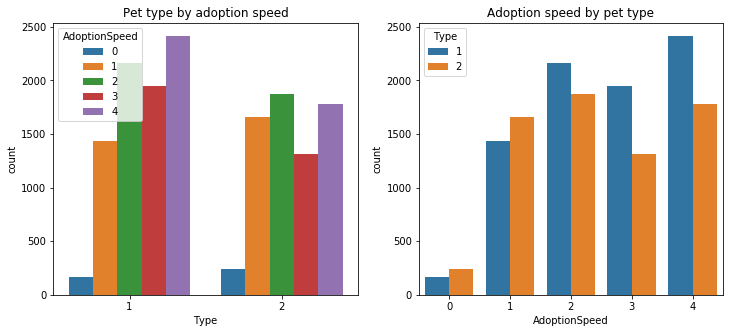

In [8]:
speed_catplot('Type', 'Pet type by adoption speed', 'Adoption speed by pet type')

On the whole, cats appear to get adopted slightly more quickly than dogs. Differences between pet types is particularly salient for adoption speeds 3 and 4.

## Pet age

The `age` feature is the age of the listed pet in months. It is unclear how age is calculated when the listing is for multiple pets.

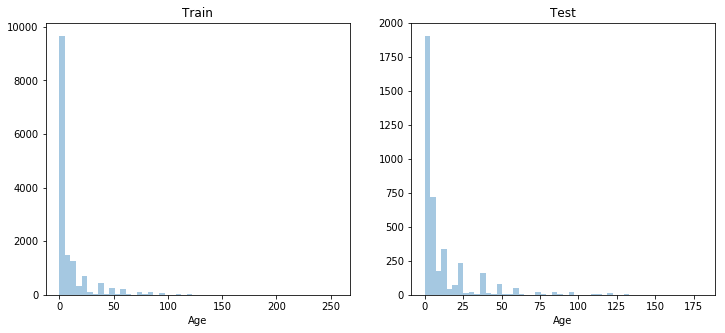

In [11]:
train_test_distplot('Age')

The majority of listed pets are very young and so the distributions are heavily right-skewed. This skew is slightly greater in the training data than in the testing data.

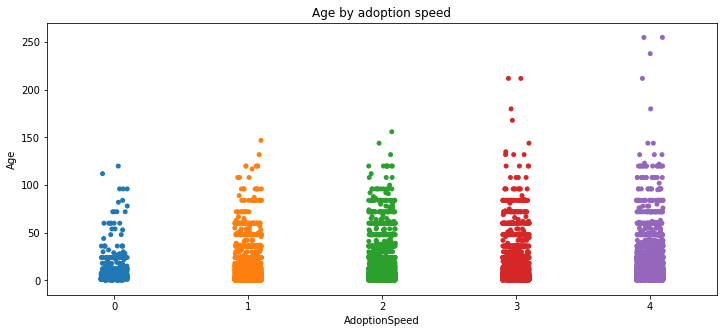

In [20]:
speed_stripplot('Age')

The plot suggests a correlation between the age of the listed pet and the adoption speed. In general, younger pets are adopted more quickly than older pets.

## Pet gender

Information about pet gender is given in the `Gender` feature:

- 1 = Male
- 2 = Female
- 3 = Mixed (if profile represents group of pets).

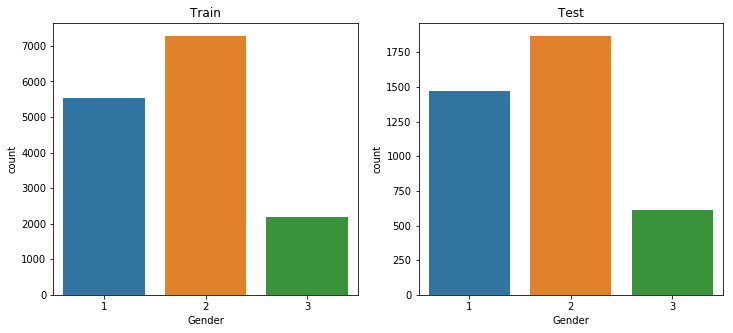

In [21]:
train_test_catplot('Gender')

Distributions are similar between the training and testing data. In both cases, female pets make up a greater proportion of the data than male pets.

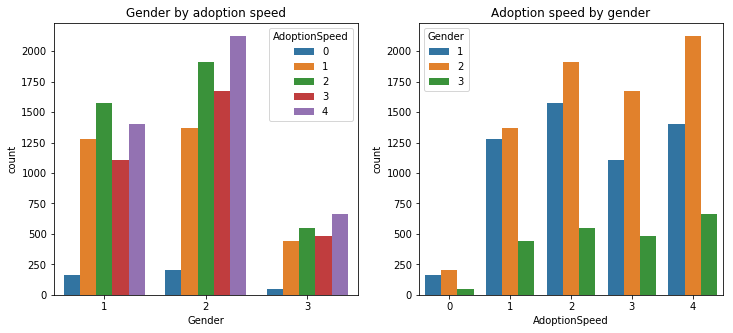

In [22]:
speed_catplot('Gender', 'Gender by adoption speed', 'Adoption speed by gender')

For adoption speeds 0 and 1, male and female pets are adopted at roughly equal rates. After that, however, female pets make up a larger proportion of the pets. This may be an artefact of their larger proportion in the sample. It is also clear here that groups containing more than one pet are rarely adopted on the same day as listing; this is returned to properly when discussing the `Quantity` feature later.

## Pet size at maturity

`MaturitySize` is a categorical feature that refers to the actual (or in the case of young animals, expected) size of the pet at maturity where:

- 1 = Small
- 2 = Medium
- 3 = Large
- 4 = Extra large
- 0 = Not specified

As with pet age, no clarification is given about this feature with regard to listings containing multiple pets.

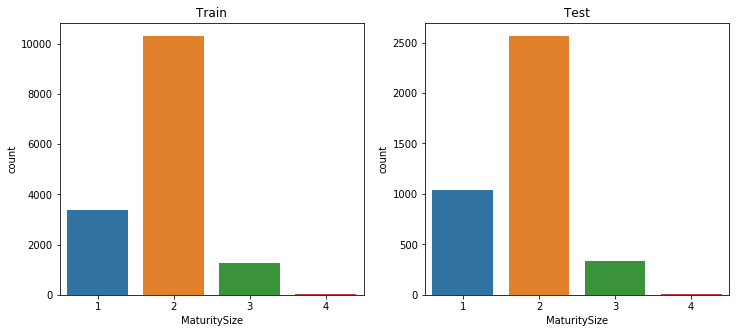

In [23]:
train_test_catplot('MaturitySize')

Again, the values of `MaturitySize` are similarly distributed between the training and testing data. Medium sized pets make up the majority of the data, with Small pets being the second most frequent size. While the data specification included an unspecified value (0), there are no pets in this group.

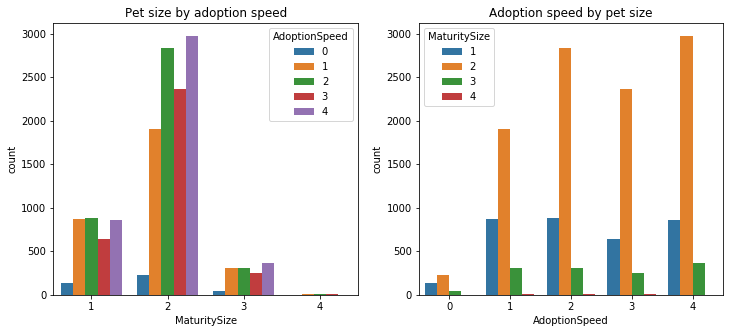

In [24]:
speed_catplot('MaturitySize', 'Pet size by adoption speed', 'Adoption speed by pet size')

Medium pets are more represented than small pets in the slower speed categories (2-4) than in the remaining quicker categories. A similar pattern is not seen for the large pets beyond them being highly unlikely to be adopted on the same day as listing (0).

## Fur length

There are four categories of fur length in the `FurLength` feature:

- 1 = Short
- 2 = Medium
- 3 = Long
- 0 = Not specified

As is becoming a recurring theme, no information is provided explaining how fur length was calculated for listings of multiple pets.

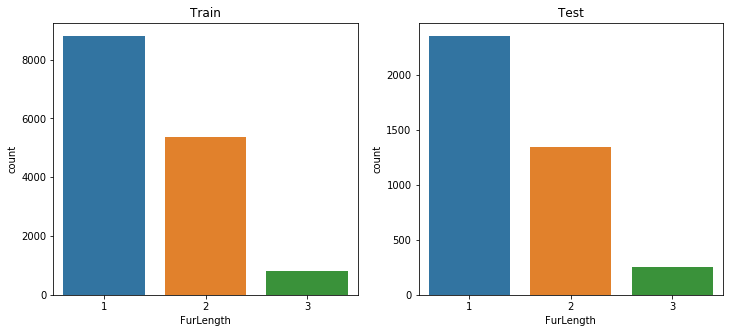

In [25]:
train_test_catplot('FurLength')

`FurLength` has the same distribution in training and testing. Short-haired pets are the most common, and there are no cases of unspecified hair length.

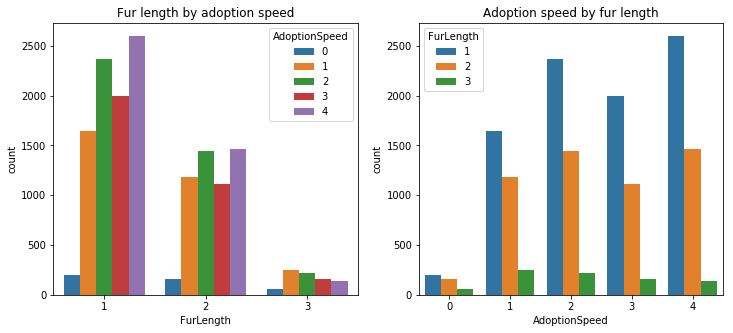

In [26]:
speed_catplot('FurLength', 'Fur length by adoption speed', 'Adoption speed by fur length')

Fur length appears to have very little impact on adoption speed.

## Vaccination status

`Vaccinated` gives information about the vaccination status of the pet:

- 1 = Vaccinated
- 2 = Unvaccinated
- 3 = Not sure.

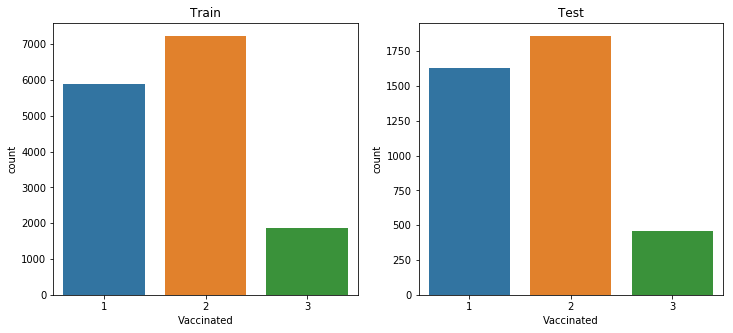

In [27]:
train_test_catplot('Vaccinated')

Of the pets with a known vaccination status, the sample is almost evenly split between vaccinated and unvaccinated animals, with the later being slightly more common than the former. This distribution is seen in both sets of data.

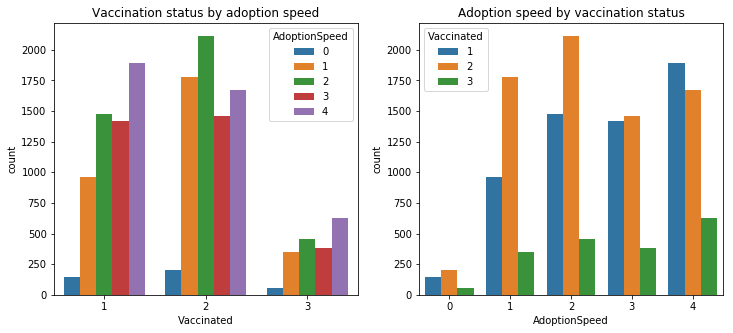

In [28]:
speed_catplot('Vaccinated', 'Vaccination status by adoption speed', 'Adoption speed by vaccination status')

Unvaccinated pets make up a larger proportion of pets adopted within 30 days (0-2) compared with those adopted in a longer period of time. In terms of pets not adopted within 100 days (4), more are vaccinated than not. In other words, unvaccinated pets may, in general, be adopted slightly more quickly than vaccinated pets.

## Deworming status

The `Dewormed` feature records if a pet has been dewormed, where:

- 1 = Yes
- 2 = No
- 3 = Not sure

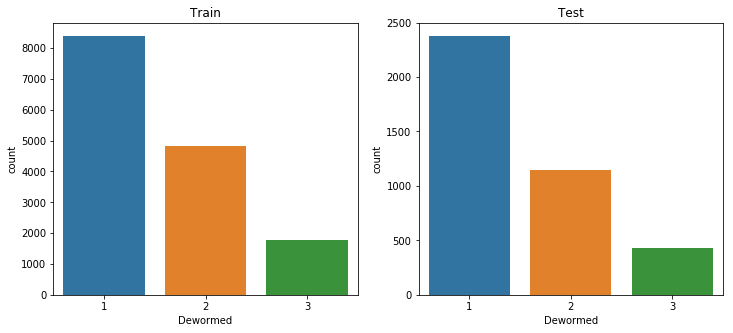

In [29]:
train_test_catplot('Dewormed')

More pets have been dewormed than not. As usual, distributions in this feature are similar between the datasets.

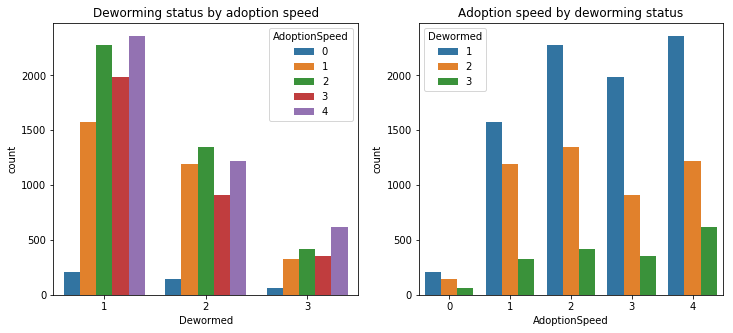

In [30]:
speed_catplot('Dewormed', 'Deworming status by adoption speed', 'Adoption speed by deworming status')

Whether or not a pet has been dewormed appears to have a minimal relationship with the speed of adoption.

## Pet sterilization

The `Sterilized` feature relates to whether a pet has been spayed or neutered, where:
- 1 = Yes
- 2 = No
- 3 = Not sure

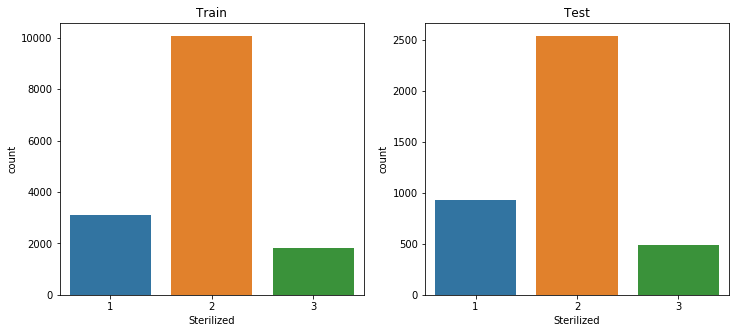

In [31]:
train_test_catplot('Sterilized')

The majority of pets listed have not been sterilized. It is possible this is not as common a procedure in Malaysia as it is in e.g. the UK and the US. Distributions between data sets are similar.

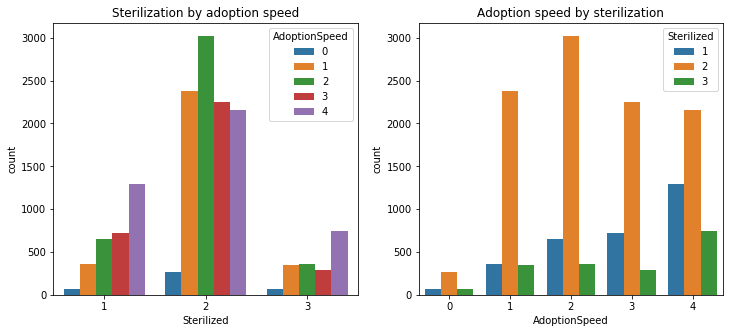

In [32]:
speed_catplot('Sterilized', 'Sterilization by adoption speed', 'Adoption speed by sterilization')

Sterilized pets appear to be much less likely to be quickly adopted than unsterilized pets, with more than twice as many in category 4 as in category 1. This may suggest that, along with not being the norm (at least for pets offered for adoption), sterilization is considered undesirable.

## Pet health

`Health` deals with the overall health of the listed pet, with:

- 1 = Healthy
- 2 = Minor injury
- 3 = Major injury
- 0 = Unspecified

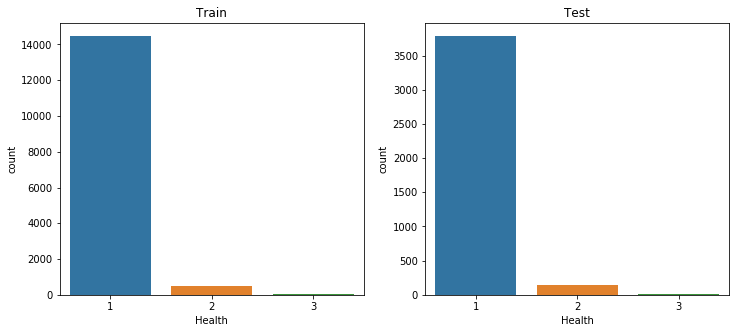

In [33]:
train_test_catplot('Health')

Listed pets are overwhelmingly healthy. This will make it more difficult to discover any potentially salient patterns amongst those that are unhealthy or injured.

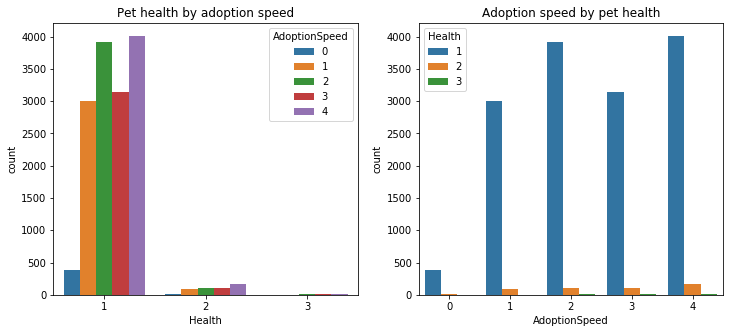

In [34]:
speed_catplot('Health', 'Pet health by adoption speed', 'Adoption speed by pet health')

Although it is very difficult to tell, pets with minor injuries may be adopted more slowly than those that are healthy. There are too few listed pets with serious injuries for a similar trend to be observed.

## Quantity

Some listings are for the adoption of multiple animals; this is the `Quantity` feature.

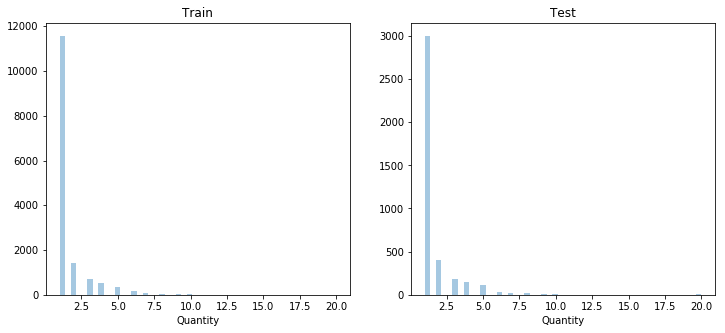

In [35]:
train_test_distplot('Quantity')

Listings with only a single animal are the most frequent. Again, both training and testing data has the same distribution.

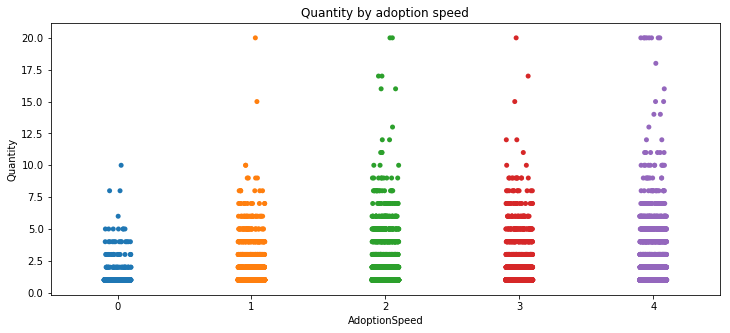

In [36]:
speed_stripplot('Quantity')

As mentioned earlier in the Pet Gender section, larger groups of pets are less likely to be adopted on the same day as listing (0). In addition, the quantity variable shows that larger groups take longer to be adopted overall than smaller groups, although there are clear exceptions to this pattern such as the 20-animal group in category 1.

## Fees

Some listings include an adoption fee. The competition data summary on Kaggle does not mention the currency.

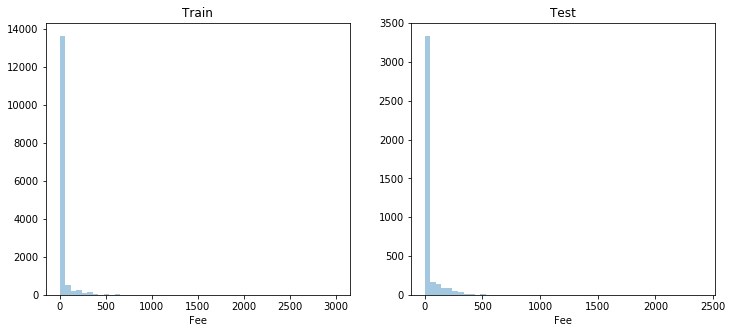

In [38]:
train_test_distplot('Fee')

Most pets are offered for free, or for a minimal fee. However, both training and testing distributions have a long tail, with fees reaching 3000 and 2400 respectively.

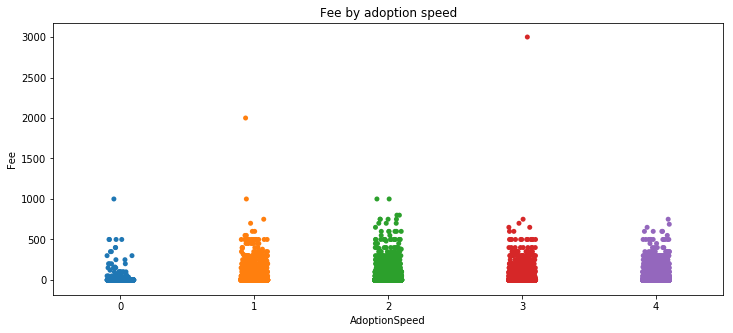

In [40]:
speed_stripplot('Fee')

The adoption fee seems to have little impact on the adoption speed.

## Number of videos

Videos of a pet can be included in the adoption listing - this is the `VideoAmt` feature.

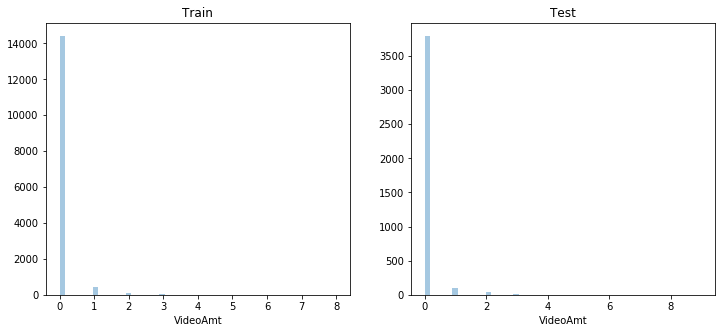

In [41]:
train_test_distplot('VideoAmt')

In both training and testing data, most pet listings do not contain any videos.

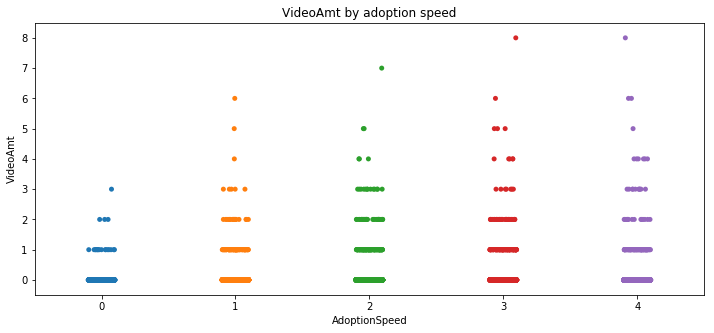

In [42]:
speed_stripplot('VideoAmt')

Including more videos appears to weakly correlate with a slower adoption speed. This may, however, be spurious. It may also, to speculate for a moment, be possible to upload more videos after the adoption listing has been made - if so, some videos may be added to pets that are already struggling to be adopted quickly in an attempt to get them adopted.

## Number of photos

Similar to the previous feature, `PhotoAmt` is the number of uploaded photos for each adoption listing.

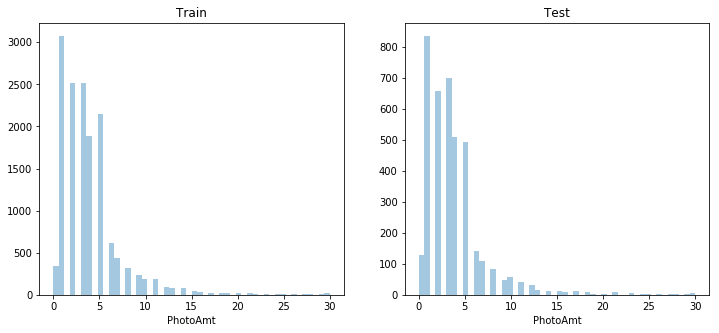

In [43]:
train_test_distplot('PhotoAmt')

It is common for listings to have between 0 and 5 photos, but some have up to 30.

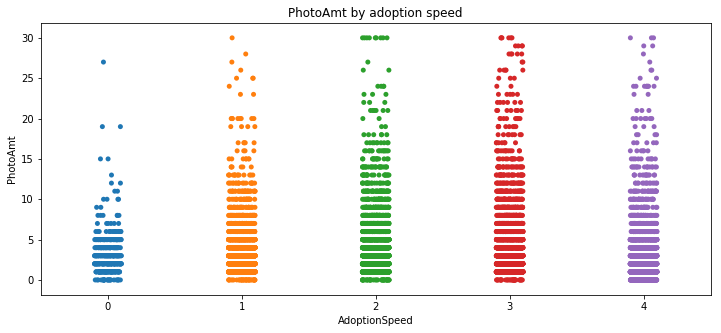

In [44]:
speed_stripplot('PhotoAmt')

## Pet colour

The colour of pets is split across three separate features, with `Color1` representing the primary colour of the animal, `Color2` the secondary and `Color3` the tertiary. There are 7 colours (and one NA value):

- 1	Black
- 2	Brown
- 3	Golden
- 4	Yellow
- 5	Cream
- 6	Gray
- 7	White
- 0 No colour

### Color1

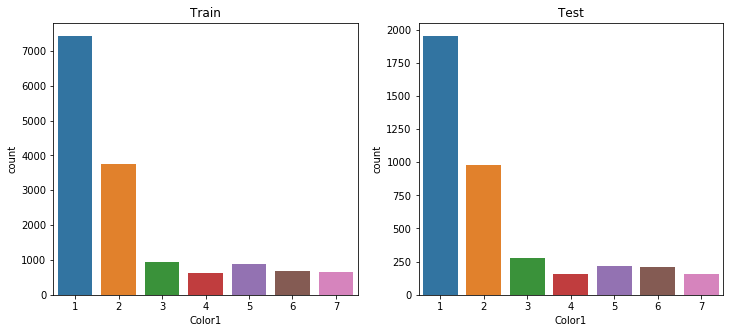

In [45]:
train_test_catplot('Color1')

Black and brown are the two most frequent primary colours in both the training and testing data.

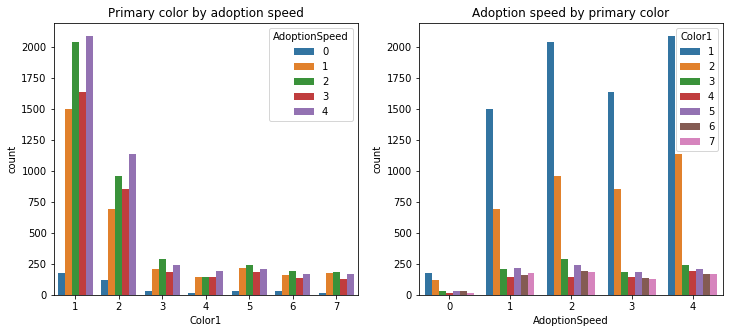

In [46]:
speed_catplot('Color1', 'Primary color by adoption speed', 'Adoption speed by primary color')

The primary colour of an animal appears to have minimal systemic impact on the adoption speed.

### Color2

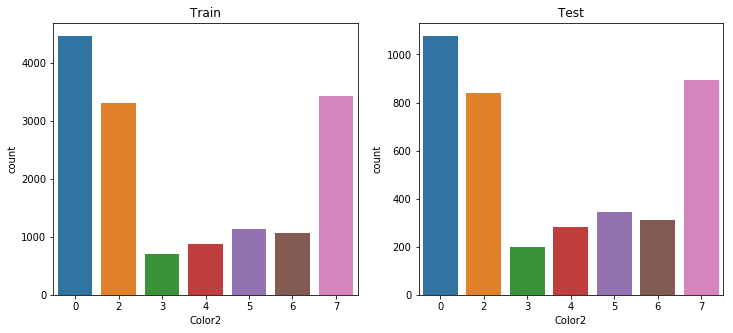

In [47]:
train_test_catplot('Color2')

Most frequently, pets only have a single colour. Where two are present, the most common secondary colours are brown and white.

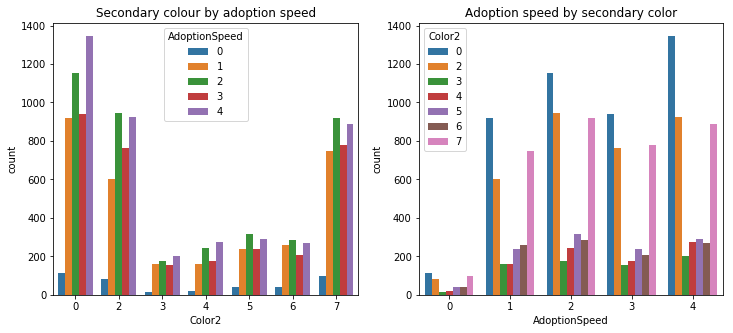

In [48]:
speed_catplot('Color2', 'Secondary colour by adoption speed', 'Adoption speed by secondary color')

As with the primary colour, the secondary colour of a pet has no clear relationship with the adoption speed of said pet.

### Color3

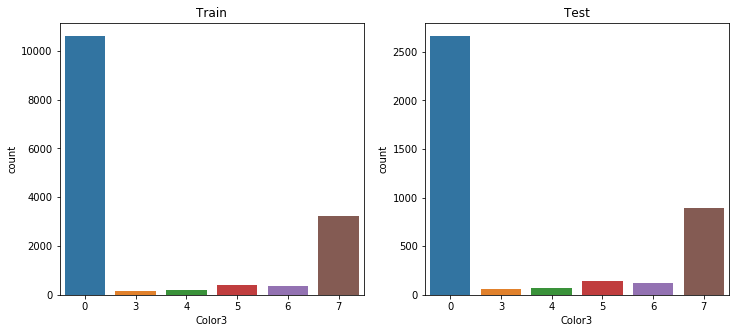

In [49]:
train_test_catplot('Color3')

The overwhelming majority of pets do not have a tertiary colour. The most common tertiary colour is white.

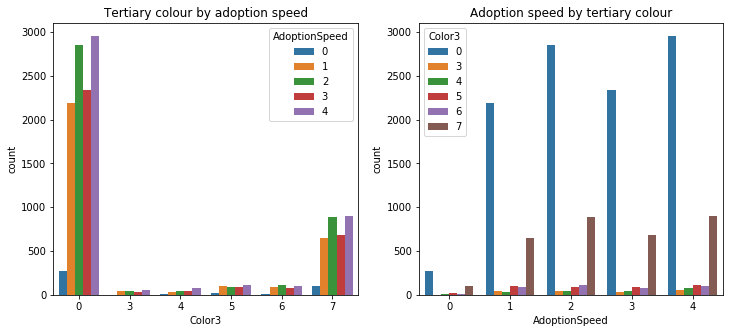

In [50]:
speed_catplot('Color3', 'Tertiary colour by adoption speed', 'Adoption speed by tertiary colour')

The presence of a tertiary colour does not appear to have an impact on adoption speed.

## Malaysian state

`State` contains codes for the state of Malaysia in which the pet is available for adoption. The conversion between labels and state names is below:

In [52]:
states

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


There are too many states to neatly plot, so the data is shown in tables instead.

In [58]:
all_train['State'].value_counts()

41326    8714
41401    3845
41327     843
41336     507
41330     420
41332     253
41324     137
41325     110
41335      85
41361      26
41345      22
41367      15
41342      13
41415       3
Name: State, dtype: int64

In [59]:
all_test['State'].value_counts()

41326    2018
41401    1279
41327     229
41336     136
41330     104
41332      55
41324      47
41325      45
41342      22
41345       7
41367       2
41361       2
41335       2
Name: State, dtype: int64

Looking at this and comparing it to the [state population sizes](https://en.wikipedia.org/wiki/States_and_federal_territories_of_Malaysia) on Wikipedia, the ordering here is largely an ordering of states by population. Basically, larger states have more animals listed for adoption than smaller states. This is unsurprising. It might be beneficial to create a *per capita* feature later on to fix this.

## Pet breeds

TODO.

There's rather a lot of them and it'll take time to work out how best to approach the visualisation.

## Summary

Very few of the features provided in `train.csv` and `test.csv` appear to have much impact on the target variable `AdoptionSpeed`. This will make highly accurate predictions difficult. It should be noted, however, that no correlation tests have been carried out at this stage. While it is common to visualisation correlation matrices before modeling, in this project I take the approach of fitting a random forest to the totality of the features (including those derived in the Feature Engineering notebook) and examing both feature importances and correlations from that model.